In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
covid_df=pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
covid_df.Zip = covid_df.Zip.astype('Int64')
covid_df.Zip = covid_df.Zip.astype('str')

In [35]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Specimen Collection Date  8832 non-null   object
 1   Zip                       8832 non-null   object
 2   Cases                     8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [10]:
covid_df.head(10)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1
5,3/11/2020,37210,1
6,3/11/2020,37212,2
7,3/11/2020,37214,1
8,3/11/2020,37215,3
9,3/12/2020,<NA>,1


In [ ]:
covid_zip.tail()

In [ ]:
covid_df.info()

In [ ]:
covid_df.Zip = covid_zip.Zip.astype('str')

In [ ]:
covid_df.info()

In [ ]:
case_by_zip = covid_df.groupby("Zip")["Cases"].count()

In [ ]:
case_by_zip

In [ ]:
case_by_zip.plot(kind = 'bar');

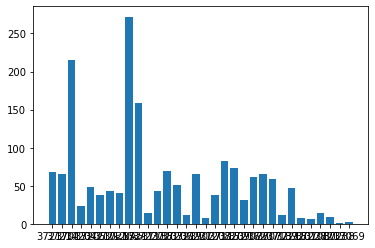

In [16]:
plt.bar('Zip', 'Cases', data = covid_df);

Ungrouped data in a bar plot above....neato....and really messy....just trying it to remember the other syntax of making a bar plot

Reading in vaccine data:

In [12]:
vaccine_df = pd.read_csv('../data/vaccine_with_protocol.csv')

In [36]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [13]:
vaccine_df.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


reading in ethnicity data:


In [14]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx')

In [15]:
ethnicity_df.head()

,B03002,Hispanic or Latino Origin by Race,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236
0,NaN,37010,NaN,37012,NaN,37013,NaN,37014,NaN,37015,...,38552,NaN,38560,NaN,38563,NaN,38567,NaN,38569,NaN
1,NaN,Value,Error,Value,Error,Value,Error,Value,Error,Value,...,Value,Error,Value,Error,Value,Error,Value,Error,Value,Error
2,Total:,4966,647,2185,338,97939,2456,2835,382,17665,...,157,86,1405,243,3410,459,685,288,69,48
3,Not Hispanic or Latino:,4803,638,2134,321,81131,2548,2783,376,16768,...,157,86,1405,243,3410,459,660,291,69,48
4,White alone,4502,664,2050,321,40080,1792,2682,374,15842,...,157,86,1307,248,3202,466,615,286,69,48


In [32]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)


In [33]:
ethnicity_df.head()

,Unnamed: 0_level_0,37010,37012,37013,37014,37015,37016,37020,37022,37025,...,38482,38483,38487,38547,38548,38552,38560,38563,38567,38569
0,Total:,4966,2185,97939,2835,17665,950,5984,6583,5698,...,1635,5910,1044,1939,931,157,1405,3410,685,69
1,Not Hispanic or Latino:,4803,2134,81131,2783,16768,944,5824,6286,5698,...,1574,5748,1022,1912,931,157,1405,3410,660,69
2,White alone,4502,2050,40080,2682,15842,939,5137,5968,5526,...,1525,5608,838,1884,930,157,1307,3202,615,69
3,Black or African American alone,245,73,33280,18,304,0,222,173,24,...,0,31,113,0,0,0,0,140,0,0
4,American Indian and Alaska Native alone,2,0,95,0,147,0,99,32,0,...,0,0,0,28,1,0,2,0,0,0


In [34]:
ethnicity_df.dtypes

Unnamed: 0_level_0    object
37010                  int64
37012                  int64
37013                  int64
37014                  int64
                       ...  
38552                  int64
38560                  int64
38563                  int64
38567                  int64
38569                  int64
Length: 119, dtype: object

In [37]:
pd.merge(vaccine_df, ethnicity_df,on='zipcode')

KeyError: 'zipcode'